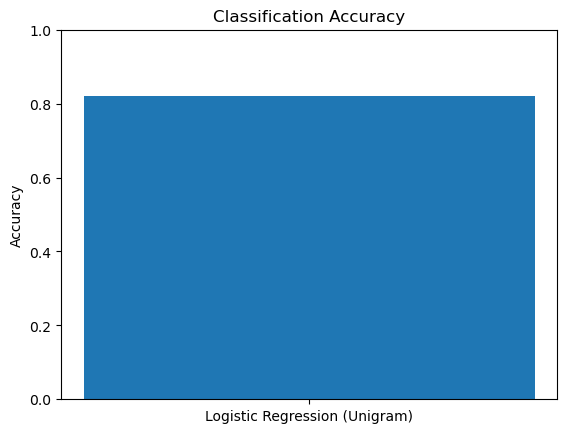

In [2]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the dataset (tab-separated, no header)
data = pd.read_csv(
    "/mnt/data/amazon_cells_labelled.txt",
    sep="\t",
    header=None,
    names=["text", "label"]
)

X = data["text"]
y = data["label"]

# Train / test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Default unigram encoding
vectorizer = CountVectorizer()   # unigrams, raw counts
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Logistic regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train_vec, y_train)

# Evaluate
y_pred = model.predict(X_test_vec)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.3f}")


